## Проверить отсутсвие влияния других данных кроме опорных векторов

### Почти исходный код

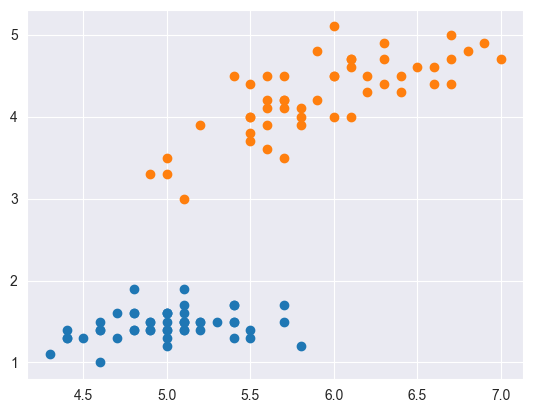

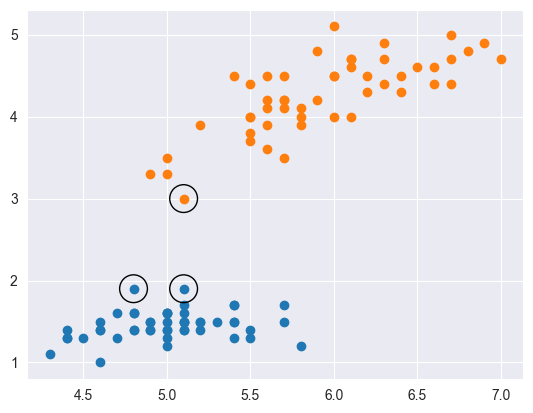

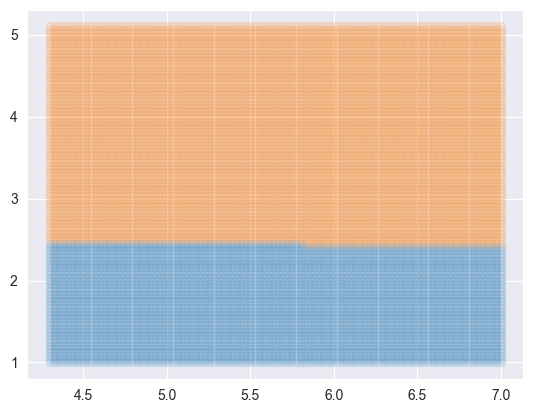

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

iris = sns.load_dataset('iris')
data = iris[['sepal_length', 'petal_length', 'species']]
data_df = data[(data['species'] == 'setosa') | (data['species'] == 'versicolor')]

X = data_df[['sepal_length', 'petal_length']]
y = data_df['species']

data_df_setosa = data_df[data_df['species'] == 'setosa']
data_df_versicolor = data_df[data_df['species'] == 'versicolor']

plt.scatter(data_df_setosa['sepal_length'], data_df_setosa['petal_length'])
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

plt.show()
model = SVC(kernel='linear', C=10000)
model.fit(X, y)
plt.scatter(data_df_setosa['sepal_length'], data_df_setosa['petal_length'])
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=400, facecolor='None', edgecolors='black')
plt.show()

x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length'])
X_p_copy = X_p.copy() # СОЗДАЁМ КОПИЮ
X_p['species'] = model.predict(X_p)

X_p_setosa = X_p[X_p['species'] == 'setosa']
X_p_versicolor = X_p[X_p['species'] == 'versicolor']

plt.scatter(X_p_setosa['sepal_length'], X_p_setosa['petal_length'], alpha=0.1)
plt.scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], alpha=0.1)

plt.show()

### Проверка совпадения

In [18]:
support_indices = model.support_  # Индексы опорных векторов в X

all_indices = np.arange(len(X))  # Все индексы от 0 до len(X)-1
non_support_indices = np.setdiff1d(all_indices, support_indices)  # Индексы не опорных векторов

# 3. Выбор 10 случайных не опорных точек для удаления
np.random.seed(42)
indices_to_remove = np.random.choice(non_support_indices, size=10, replace=False)

mask = ~np.isin(np.arange(len(X)), indices_to_remove)
X_reduced = X.iloc[mask]
y_reduced = y.iloc[mask]

model_reduced = SVC(kernel='linear', C=10000)
model_reduced.fit(X_reduced, y_reduced)

X_p_copy['species_reduced'] = model_reduced.predict(X_p_copy)

#Проверка совпадения предсказаний
are_predictions_equal = (X_p['species'] == X_p_copy['species_reduced']).all()

In [19]:
print(are_predictions_equal)

True
